In [3]:
# Attempt at T5 finetuning with simplet5

In [2]:
!pip install simplet5

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 45.5 MB/s eta 0:00:00
  Created wheel for simplet5: filename=simplet5-0.1.4-py3-none-any.whl size=6853 sha256=575d65e3cade2372ff7aacfd3ca9ff0135c6ee236d91a5eeb038687275f06812
  Stored in directory: /root/.cache/pip/wheels/b4/7d/af/743765400878438a7593f13f89fdf4004dcde0f2a8e6cb6684
Successfully built simplet5
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attemptin

In [2]:
# import
#from simplet5 import SimpleT5
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# Upload the dataset from local storage
from google.colab import files
uploaded = files.upload()

Saving congress_115_text.csv to congress_115_text.csv


In [5]:
len(congress_115_text_df['Text'][1600])

7239

In [4]:
# import dataset from csv
congress_115_text_df = pd.read_csv('congress_115_text.csv')
congress_115_text_df.head()

,BillNumber,Summary,TextUrl,Text
0,5,(This measure has not been amended since it wa...,https://www.congress.gov/115/bills/hr5/BILLS-1...,<html><body><pre>\n[Congressional Bills 115th ...
1,7,(This measure has not been amended since it wa...,https://www.congress.gov/115/bills/hr7/BILLS-1...,<html><body><pre>\n[Congressional Bills 115th ...
2,10,Financial CHOICE Act of 2017\n\n (Sec. 2) This...,https://www.congress.gov/115/bills/hr10/BILLS-...,<html><body><pre>\n[Congressional Bills 115th ...
3,15,Raise the Wage Act\n\nThis bill amends the Fai...,https://www.congress.gov/115/bills/hr15/BILLS-...,<html><body><pre>\n[Congressional Bills 115th ...
4,19,Smithsonian Women's History Museum Act\n\nThis...,https://www.congress.gov/115/bills/hr19/BILLS-...,<html><body><pre>\n[Congressional Bills 115th ...


In [8]:
# format dataset for simpleT5, ie bills stored as "source_text" beginning with "summarize: "
# and summarizations stored as "target_text"
text_to_summarize_df = congress_115_text_df.rename(columns={"Summary":"target_text", "Text":"source_text"})
text_to_summarize_df = text_to_summarize_df[['source_text', 'target_text']]
text_to_summarize_df.head()

,source_text,target_text
0,<html><body><pre>\n[Congressional Bills 115th ...,(This measure has not been amended since it wa...
1,<html><body><pre>\n[Congressional Bills 115th ...,(This measure has not been amended since it wa...
2,<html><body><pre>\n[Congressional Bills 115th ...,Financial CHOICE Act of 2017\n\n (Sec. 2) This...
3,<html><body><pre>\n[Congressional Bills 115th ...,Raise the Wage Act\n\nThis bill amends the Fai...
4,<html><body><pre>\n[Congressional Bills 115th ...,Smithsonian Women's History Museum Act\n\nThis...


In [9]:
# T5 model expects a task related prefix: since it is a summarization task, we will add a prefix "summarize: "
text_to_summarize_df['source_text'] = "summarize: " + text_to_summarize_df['source_text']
text_to_summarize_df.head()

,source_text,target_text
0,summarize: <html><body><pre>\n[Congressional B...,(This measure has not been amended since it wa...
1,summarize: <html><body><pre>\n[Congressional B...,(This measure has not been amended since it wa...
2,summarize: <html><body><pre>\n[Congressional B...,Financial CHOICE Act of 2017\n\n (Sec. 2) This...
3,summarize: <html><body><pre>\n[Congressional B...,Raise the Wage Act\n\nThis bill amends the Fai...
4,summarize: <html><body><pre>\n[Congressional B...,Smithsonian Women's History Museum Act\n\nThis...


In [10]:
train_df, test_df = train_test_split(text_to_summarize_df, test_size=0.2)
train_df.shape, test_df.shape

((1804, 2), (451, 2))

In [11]:
model = SimpleT5()
model.from_pretrained(model_type="t5", model_name="t5-base")
model.train(train_df=train_df[:5000],
            eval_df=test_df[:100],
            source_max_token_len=128,
            target_max_token_len=50,
            batch_size=8, max_epochs=3, use_gpu=True)


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/850M [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.distributed:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.seed:Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [12]:
# seems to have worked once and then stopped working?
#model.load_model("t5","outputs/simplet5-epoch-2-train-loss-1.7785-val-loss-1.8461", use_gpu=True)

In [7]:
# Mount Drive for upload/downloads
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:

from transformers import TFAutoModelForSeq2SeqLM, AutoTokenizer, pipeline

# Replace 'path/to/your/model' with the correct path to your model
model_path = "outputs/simplet5-epoch-2-train-loss-1.7785-val-loss-1.8461"

# Load the model
model = TFAutoModelForSeq2SeqLM.from_pretrained(model_path, from_pt=True)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Set the maximum length for tokenization
max_input_length = 1024

# Tokenize the input text with the specified maximum length
#tokens = tokenizer(text_to_summarize, max_length=max_input_length, return_tensors="tf", truncation=True)

# Get the summarized output
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)
summary = summarizer(text_to_summarize)


401 Client Error: Unauthorized for url: https://huggingface.co/outputs/simplet5-epoch-2-train-loss-1.7785-val-loss-1.8461/resolve/main/config.json


OSError: ignored

In [9]:
# KEEP THIS ONE
# Import model from Drive
from transformers import TFAutoModelForSeq2SeqLM, AutoTokenizer

# Replace 'path/to/your/model' with the correct path to your model
model_path = "/content/drive/MyDrive/finetuned_t5_model"

# Load the model
model = TFAutoModelForSeq2SeqLM.from_pretrained(model_path, from_pt=True)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# Set the maximum length for tokenization
max_input_length = 5000

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFT5ForConditionalGeneration: ['lm_head.weight', 'decoder.embed_tokens.weight', 'encoder.embed_tokens.weight']
- This IS expected if you are initializing TFT5ForConditionalGeneration from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFT5ForConditionalGeneration from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

In [11]:
# Get the summarized output
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)
summary = summarizer(text_to_summarize)


Token indices sequence length is longer than the specified maximum sequence length for this model (1442 > 512). Running this sequence through the model will result in indexing errors


## Using fine-tuned T5

In [12]:
text_to_summarize = congress_115_text_df["Text"][1600]
# Assuming 'text_to_summarize' is your input string
# text_to_summarize = "Your input text goes here..."

# Tokenize the input text with the specified maximum length
tokens = tokenizer(text_to_summarize, max_length=max_input_length, return_tensors="tf", truncation=True)

# Get the summarized output
summary = summarizer(text_to_summarize, max_length=1000, min_length=200, length_penalty=2.0, num_beams=4, no_repeat_ngram_size=2, early_stopping=True)
print(summary[0]['summary_text'])


Prescription Drug Monitoring Act of 2017 This bill amends the Public Health Service Act to require the Department of Health and Human Services (HHS) to establish and maintain an inter-state data-sharing single hub to facilitate the sharing of PDMP data among states and to ensure that the data is available for public and private use. The bill also directs HHS, in coordination with other federal agencies, to: (1) provide information on the health care system; ( . ;; .' ( - "      " " " ( "  ( n den " ""- " " "" " "n  ( (n- s, " ' "s ". " -- " "


In [13]:
# Compare with published summary
published_summary = congress_115_text_df["Summary"][1600]
print(published_summary)

Prescription Drug Monitoring Act of 2017

This bill requires a state that receives grant funds under the prescription drug monitoring program (PDMP) or the controlled substance monitoring program to comply with specified requirements, including a requirement to share its PDMP data with other states. The Department of Justice (DOJ) or Department of Health and Human Services may withhold grant funds from a state that fails to comply.

 To facilitate data sharing among states, the bill directs DOJ to award a grant under the Comprehensive Opioid Abuse Grant Program to establish and maintain a data-sharing hub.


In [14]:
# REtrieve bill number
congress_115_text_df["BillNumber"][1600]

1854

In [ ]:
text_to_summarize = congress_115_text_df["Text"][1600]
# Assuming 'text_to_summarize' is your input string
# text_to_summarize = "Your input text goes here..."

# Tokenize the input text with the specified maximum length
tokens = tokenizer(text_to_summarize, max_length=max_input_length, return_tensors="tf", truncation=True)

# Get the summarized output
summary = summarizer(text_to_summarize, max_length=500, min_length=50, length_penalty=2.0, num_beams=4, no_repeat_ngram_size=2, early_stopping=True)
print(summary[0]['summary_text'])


In [ ]:
text_to_summarize = congress_115_text_df["Text"][1600]

# Tokenize the input text with the specified maximum length
tokens = tokenizer(text_to_summarize, max_length=max_input_length, return_tensors="tf", truncation=True)

# Get the summarized output
summary = summarizer(text_to_summarize, max_length=500, min_length=100, length_penalty=2.0, num_beams=4, no_repeat_ngram_size=2, early_stopping=True)
print(summary[0]['summary_text'])


## Exporting finetuned simpleT5 model to Drive

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Export files to Drive folder, individually because large
#!cp /content/outputs/simplet5-epoch-2-train-loss-1.7785-val-loss-1.8461/tokenizer_config.json /content/drive/MyDrive/finetuned_t5_model

In [ ]:

#!cp /content/outputs/simplet5-epoch-2-train-loss-1.7785-val-loss-1.8461/tokenizer.json /content/drive/MyDrive/finetuned_t5_model

In [ ]:

#!cp /content/outputs/simplet5-epoch-2-train-loss-1.7785-val-loss-1.8461/spiece.model /content/drive/MyDrive/finetuned_t5_model

In [ ]:

#!cp /content/outputs/simplet5-epoch-2-train-loss-1.7785-val-loss-1.8461/special_tokens_map.json /content/drive/MyDrive/finetuned_t5_model

In [ ]:

#!cp /content/outputs/simplet5-epoch-2-train-loss-1.7785-val-loss-1.8461/pytorch_model.bin /content/drive/MyDrive/finetuned_t5_model

## Trying again with Falconsai/text_summarization

In [ ]:
# from transformers import pipeline

#summarizer = pipeline("summarization", model="Falconsai/text_summarization")


In [ ]:
#text_to_summarize = congress_115_text_df["Text"][1400]
#print(summarizer(text_to_summarize, max_length=230, min_length=30, do_sample=False))

In [ ]:
#text_to_summarize = congress_115_text_df["Text"][1380]
#print(summarizer(text_to_summarize, max_length=230, min_length=30, do_sample=False))

## Back to splitting text into 'sections'

In [ ]:
# Example long bill
print(congress_115_text_df["Text"][80])

## Attempt to get ROUGUE scores

In [16]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24950 sha256=38bf505f244e762ceb93e44211f022e424c075b1571da828d4f97d8c8d9c773a
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [17]:
from rouge_score import rouge_scorer

def calculate_rouge_scores(hypotheses, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    rouge_scores = {
        'rouge1': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0},
        'rouge2': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0},
        'rougeL': {'precision': 0.0, 'recall': 0.0, 'f1': 0.0}
    }

    for hypothesis, reference in zip(hypotheses, references):
        scores = scorer.score(reference, hypothesis)
        for metric, values in scores.items():
            rouge_scores[metric]['precision'] += values.precision
            rouge_scores[metric]['recall'] += values.recall
            rouge_scores[metric]['f1'] += values.fmeasure

    num_samples = len(hypotheses)

    for metric in rouge_scores:
        rouge_scores[metric]['precision'] /= num_samples
        rouge_scores[metric]['recall'] /= num_samples
        rouge_scores[metric]['f1'] /= num_samples

    return rouge_scores



In [ ]:
# Example usage:
model_generated_summaries =
reference_summaries = ["Reference summary 1", "Reference summary 2", ...]

rouge_scores = calculate_rouge_scores(model_generated_summaries, reference_summaries)

print("ROUGE Scores:")
for metric, values in rouge_scores.items():
    print(f"{metric}: Precision={values['precision']}, Recall={values['recall']}, F1={values['f1']}")


In [18]:
from tqdm import tqdm
import pandas as pd
from transformers import pipeline

# Subset of your dataframe (assuming 'congress_115_text_df' is your DataFrame)
subset_df = congress_115_text_df.head(20)

# Function to generate summaries using the T5 model
def generate_summaries(texts, model, tokenizer, max_length):
    summaries = []
    for text in tqdm(texts, desc="Generating Summaries"):
        inputs = tokenizer.encode("summarize: " + text, return_tensors="tf", max_length=max_length, truncation=True)
        summary_ids = model.generate(inputs, max_length=max_length, num_beams=4, length_penalty=2.0, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)
    return summaries

# Generate summaries using the T5 model
generated_summaries = generate_summaries(subset_df['Text'], model, tokenizer, max_input_length)

# Evaluate ROUGE scores
reference_summaries = subset_df['Summary'].tolist()

rouge_scores = calculate_rouge_scores(generated_summaries, reference_summaries)

# Print ROUGE scores
print("ROUGE Scores:")
for metric, values in rouge_scores.items():
    print(f"{metric}: Precision={values['precision']}, Recall={values['recall']}, F1={values['f1']}")


Generating Summaries: 100%|██████████| 20/20 [06:23<00:00, 19.15s/it]


ROUGE Scores:
rouge1: Precision=0.659117273907049, Recall=0.2162465247764746, F1=0.26272418621719645
rouge2: Precision=0.42420415389875704, Recall=0.14244941002637831, F1=0.17311730232931083
rougeL: Precision=0.5292718645057954, Recall=0.18045888883530758, F1=0.2166345407887898


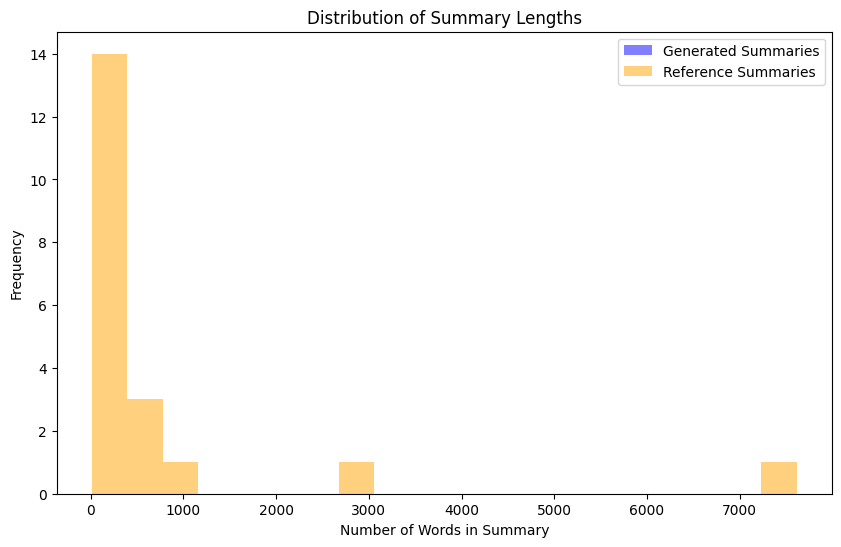

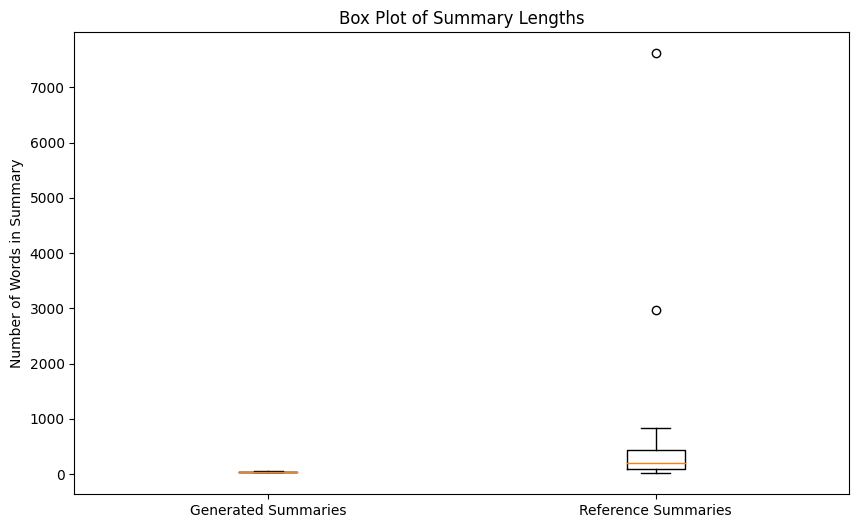

In [19]:
import matplotlib.pyplot as plt

# Calculate lengths of generated and reference summaries
generated_lengths = [len(summary.split()) for summary in generated_summaries]
reference_lengths = [len(summary.split()) for summary in reference_summaries]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(generated_lengths, bins=20, alpha=0.5, label='Generated Summaries', color='blue')
plt.hist(reference_lengths, bins=20, alpha=0.5, label='Reference Summaries', color='orange')

plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words in Summary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([generated_lengths, reference_lengths], labels=['Generated Summaries', 'Reference Summaries'])
plt.title('Box Plot of Summary Lengths')
plt.ylabel('Number of Words in Summary')
plt.show()


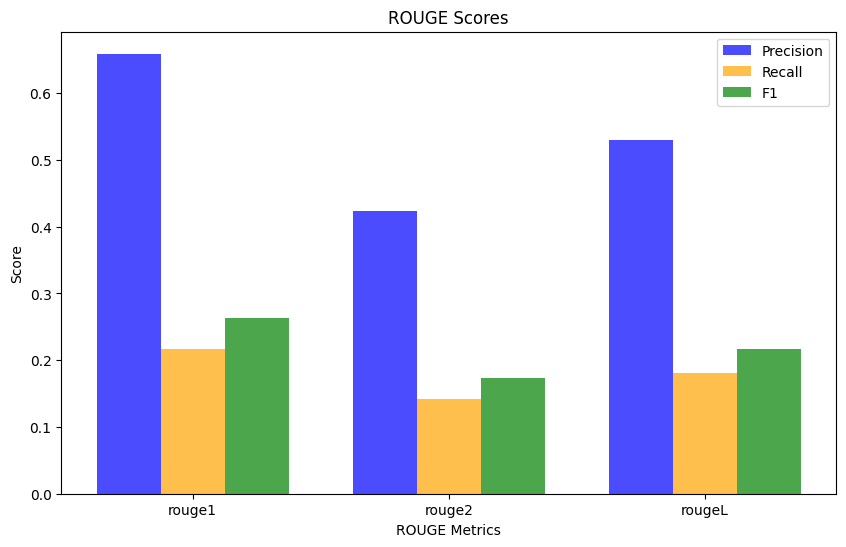

In [20]:
import matplotlib.pyplot as plt

# Replace the following with your actual ROUGE scores

rouge_scores = {
    'rouge1': {'precision': 0.659117273907049, 'recall': 0.2162465247764746, 'f1': 0.26272418621719645},
    'rouge2': {'precision': 0.42420415389875704, 'recall': 0.14244941002637831, 'f1': 0.17311730232931083},
    'rougeL': {'precision': 0.5292718645057954, 'recall': 0.18045888883530758, 'f1': 0.2166345407887898}
}

# Extract metrics and scores
metrics = list(rouge_scores.keys())
precision_scores = [rouge_scores[metric]['precision'] for metric in metrics]
recall_scores = [rouge_scores[metric]['recall'] for metric in metrics]
f1_scores = [rouge_scores[metric]['f1'] for metric in metrics]

# Create a bar chart
bar_width = 0.25
index = range(len(metrics))

plt.figure(figsize=(10, 6))

plt.bar(index, precision_scores, width=bar_width, label='Precision', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], recall_scores, width=bar_width, label='Recall', color='orange', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], f1_scores, width=bar_width, label='F1', color='green', alpha=0.7)

plt.xlabel('ROUGE Metrics')
plt.ylabel('Score')
plt.title('ROUGE Scores')
plt.xticks([i + bar_width for i in index], metrics)
plt.legend()
plt.show()


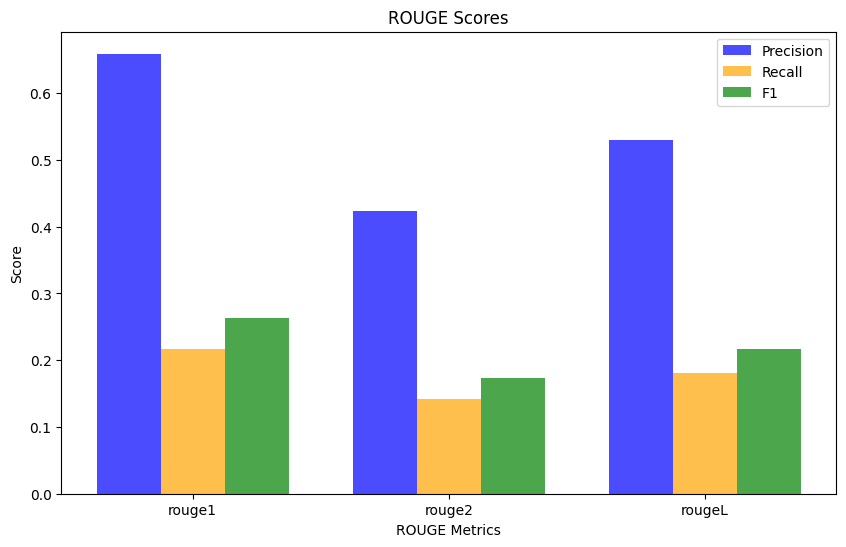

In [22]:


# Replace the following with your actual ROUGE scores
rouge_scores = {
    'rouge1': {'precision': 0.659117273907049, 'recall': 0.2162465247764746, 'f1': 0.26272418621719645},
    'rouge2': {'precision': 0.42420415389875704, 'recall': 0.14244941002637831, 'f1': 0.17311730232931083},
    'rougeL': {'precision': 0.5292718645057954, 'recall': 0.18045888883530758, 'f1': 0.2166345407887898}
}

# Extract metrics and scores
metrics = list(rouge_scores.keys())
precision_scores = [rouge_scores[metric]['precision'] for metric in metrics]
recall_scores = [rouge_scores[metric]['recall'] for metric in metrics]
f1_scores = [rouge_scores[metric]['f1'] for metric in metrics]

# Create a bar chart
bar_width = 0.25
index = range(len(metrics))

plt.figure(figsize=(10, 6))

plt.bar(index, precision_scores, width=bar_width, label='Precision', color='blue', alpha=0.7)
plt.bar([i + bar_width for i in index], recall_scores, width=bar_width, label='Recall', color='orange', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], f1_scores, width=bar_width, label='F1', color='green', alpha=0.7)

plt.xlabel('ROUGE Metrics')
plt.ylabel('Score')
plt.title('ROUGE Scores')
plt.xticks([i + bar_width for i in index], metrics)
plt.legend()

# Save the chart to Google Drive
plt.savefig('/content/drive/MyDrive/rouge_scores_chart.png')

# Display the chart
plt.show()
